## Function read data

In [1]:
import pandas as pd

def read_data(sheet_names):
    df = []
    for name in sheet_names:
        cur_df = pd.read_excel("./Data.xlsx", sheet_name=name)

        df.append(cur_df)
    return pd.concat(df, axis=0)

In [2]:
df = read_data(["Wholesale Trade change"])
name = "Wholesale Trade"
print(len(df))
df.head(10)


240


,EV,MC,PB,TQ,Leverage,Quality,Size,ROA,Growth,Tangibility,Liquidity,GDP,Inflation,Year,Company
0,0.189266,0.000624,0.031514,0.084387,0.109741,0.347276,0.026135,0.357027,0.027652,0.799164,0.107367,0.000000,1.000000,2012,AMV
1,0.190642,0.003358,0.109155,0.201859,0.207982,0.350745,0.045534,0.384991,0.041293,0.711297,0.065047,0.092896,0.704841,2013,AMV
2,0.191263,0.001245,0.100528,0.110781,0.533274,0.115124,0.034802,0.000000,0.031752,0.709585,0.152429,0.398907,0.408501,2014,AMV
3,0.190827,0.000997,0.094190,0.114498,0.487672,0.345732,0.011421,0.349095,0.028247,0.701539,0.080329,0.781421,0.000000,2015,AMV
4,0.192048,0.004539,0.262852,0.343123,0.405895,0.424648,0.000000,0.419870,0.031554,0.526867,0.100313,0.524590,0.240850,2016,AMV
5,0.275260,0.144629,0.230106,0.436803,0.134297,0.438259,0.488372,0.475493,1.000000,0.071361,0.505486,0.852459,0.341204,2017,AMV
6,0.345667,0.301523,0.299648,0.580297,0.103950,0.712505,0.561423,0.722290,0.063360,0.510433,0.193182,1.000000,0.343566,2018,AMV
7,0.347858,0.272056,0.188380,0.389219,0.069034,0.621711,0.608633,0.641550,0.051820,0.906801,0.145376,0.967213,0.256198,2019,AMV
8,0.190070,0.012363,0.169894,0.126394,0.674390,0.460544,0.296760,0.488001,0.029169,0.075004,0.119122,0.000000,1.000000,2012,ARM
9,0.193394,0.014190,0.216901,0.183271,0.624582,0.447892,0.260092,0.484747,0.024847,0.079379,0.129702,0.092896,0.704841,2013,ARM


## Descriptive Statistic

In [3]:
import pandas as pd
import scipy.stats as stats

def stats_summary(df):
    """Calculates the mean, max, min, skewness, kurtosis, and Jarque-Bera probability
    of each column in a pandas dataframe.
    """
    summary = pd.DataFrame()
    for col in ['EV', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']:
        data = df[col]
        mean = data.mean()
        max_ = data.max()
        min_ = data.min()
        stdev = data.std()
        skewness = data.skew()
        kurtosis = data.kurtosis()
        jb_prob = stats.jarque_bera(data)[1]
        summary[col] = [mean, max_, min_, stdev, skewness, kurtosis, jb_prob]
    summary.index = ['mean', 'max', 'min', 'stdev', 'skewness', 'kurtosis', 'Jarque-Bera Prob.']
    return summary

In [4]:
stats_summary(df)

,EV,MC,PB,TQ,Leverage,Quality,Size,ROA,Growth,Tangibility,Liquidity,GDP,Inflation
mean,2.890416e-01,0.109316,0.140631,1.389390e-01,0.552752,3.966639e-01,0.553589,4.337024e-01,0.045131,3.662058e-01,0.061757,0.577186,0.411895
max,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
stdev,1.276588e-01,0.158151,0.125729,1.357630e-01,0.240839,9.915603e-02,0.221963,1.008071e-01,0.065482,2.507294e-01,0.104217,0.363147,0.288812
skewness,2.192918e+00,3.122948,3.032157,2.407072e+00,-0.583615,5.101549e-01,-0.264347,9.238732e-01,13.218120,8.859199e-01,5.821238,-0.389549,0.784014
kurtosis,7.345122e+00,12.250176,13.936884,8.253896e+00,-0.338984,8.022876e+00,-0.291915,1.079590e+01,191.271512,-2.177590e-01,40.229985,-1.338795,-0.128697
Jarque-Bera Prob.,1.507588e-153,0.000000,0.000000,2.013703e-191,0.000634,3.763266e-136,0.155204,1.282085e-249,0.000000,1.395688e-07,0.000000,0.000007,0.000005


In [5]:
len(df)

240

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# fit a multiple linear regression model
# data_train = [df[df['Year'] < 2015], df[df['Year'] < 2016], df[df['Year'] < 2017], df[df['Year'] < 2018], df[df['Year'] < 2019]]
# data_test = [df[df['Year'] == 2015], df[df['Year'] == 2016], df[df['Year'] == 2017], df[df['Year'] == 2018], df[df['Year'] == 2019]]

# X_train = [data[['EVL', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']] for data in data_train]
# y_train = [data['EV'] for data in data_train]

# X_test = [data[['EVL', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']] for data in data_test]
# y_test = [data['EV'] for data in data_test]

# # create a MinMaxScaler object
data = df[['EV', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']]
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=['EV', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation'])

# Splitting the DataFrame into train and test sets
train_df, test_df = train_test_split(scaled_df, test_size=0.3, random_state=42)
X_train = train_df[['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']]
X_test = test_df[['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']]

y_train = train_df['EV']
y_test = test_df['EV']



In [7]:
X_train.head(10)
print(len(X_train))

168


In [8]:
data = {
    "LM": [],
    "Lasso": [],
    "GAM": [], 
    "RF": [],
    "GBM": [],
    "NNET": []
}

In [9]:
from sklearn.linear_model import LinearRegression

data['LM'] = []
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2


r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["LM"].append(round(r_squared*100, 4))
data["LM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

coefficients = model.coef_
# Get the variable names
variable_names = ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# Print the variable importance
print(variable_importance)


R-squared 0.4099732074180701
RMSE 0.014973334400440677
      Variable  Coefficient
0     Leverage         2.49
5  Tangibility         3.21
7          GDP        15.69
3          ROA        22.42
8    Inflation        24.46
1      Quality        40.14
4       Growth        59.59
6    Liquidity        98.09
2         Size       100.00


/tmp/ipykernel_16974/385619033.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


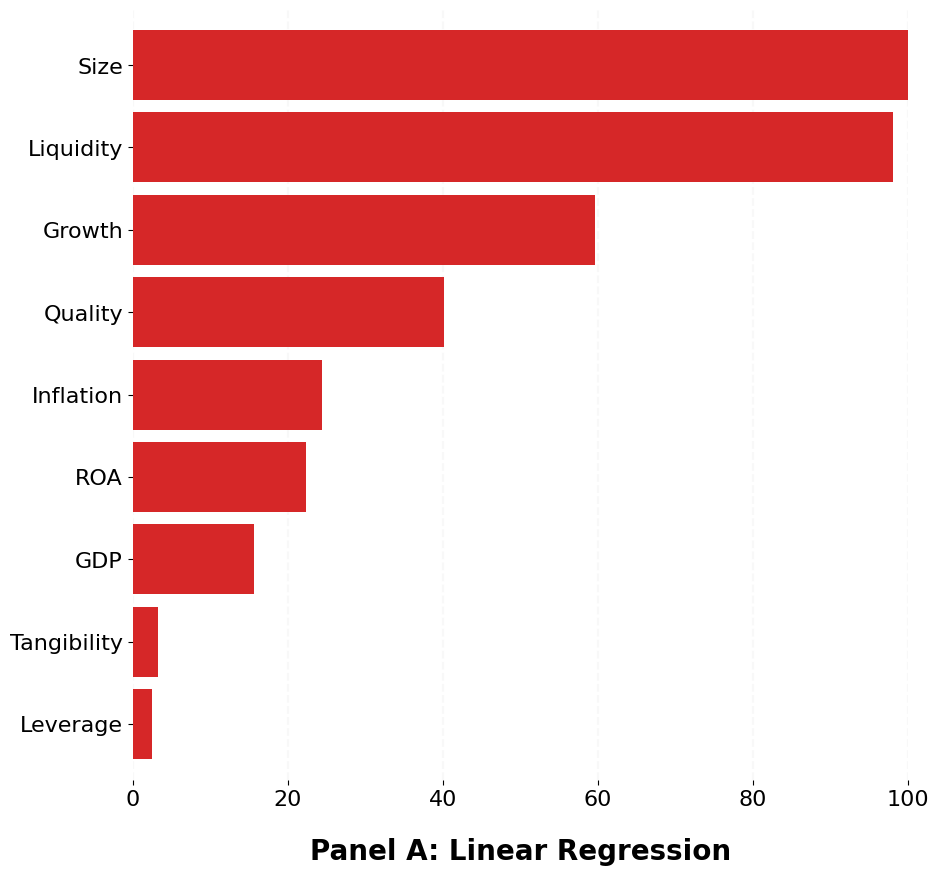

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#d62728', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel A: Linear Regression", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_LM.png')

In [11]:
from sklearn.linear_model import Lasso

data['Lasso'] = []

model = Lasso(alpha=0.0001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

print(sum_pred)
print(sum_avg)

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["Lasso"].append(round(r_squared*100, 4))
data["Lasso"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

coefficients = model.coef_
print(coefficients)
# Get the variable names
variable_names =  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# Print the variable importance
print(variable_importance)

1.0845665316482356
1.8271713935465543
R-squared 0.4064232094050667
RMSE 0.01506342405066994
[ 0.00238881  0.0632616   0.32383062 -0.          0.17029888  0.01165213
 -0.29454598 -0.04716774 -0.07184368]
      Variable  Coefficient
3          ROA         0.00
0     Leverage         0.74
5  Tangibility         3.60
7          GDP        14.57
1      Quality        19.54
8    Inflation        22.19
4       Growth        52.59
6    Liquidity        90.96
2         Size       100.00


/tmp/ipykernel_16974/3683564917.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


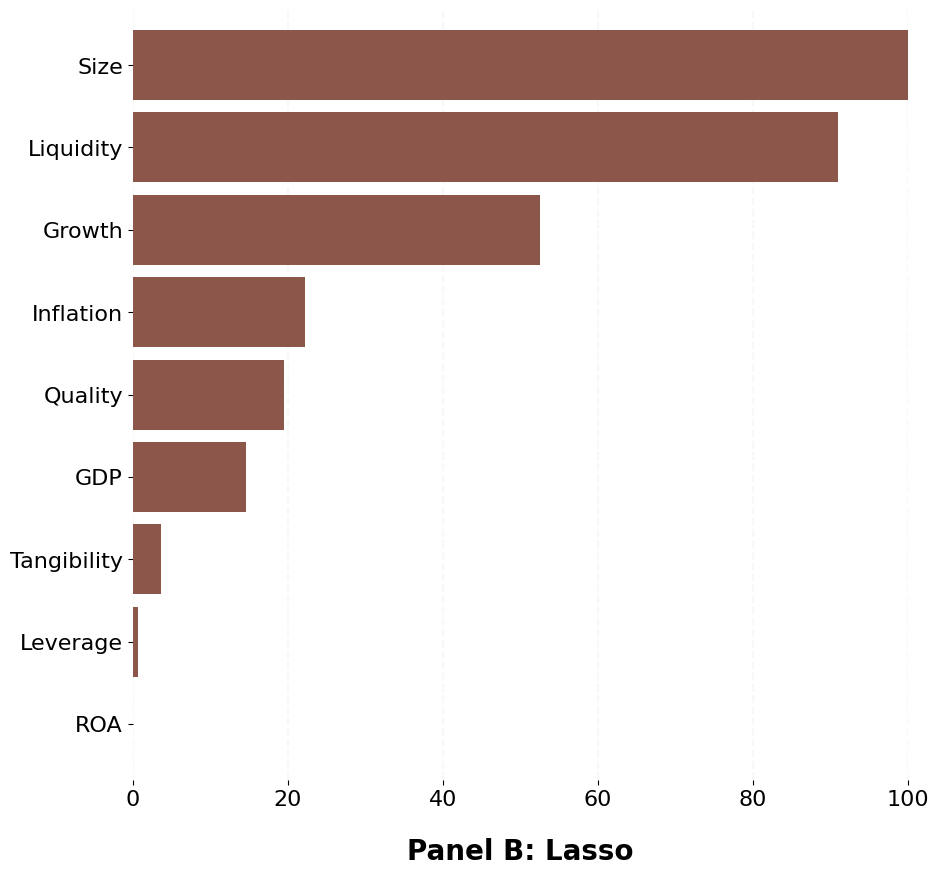

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#8c564b', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel B: Lasso", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_Lasso.png')

In [13]:
from pygam import LinearGAM

data["GAM"] = []
gam = LinearGAM()
gam.fit(X_train, y_train)
y_pred = gam.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
#  # print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["GAM"].append(round(r_squared*100, 4))
data["GAM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

 # compute variable importance
variable_names = ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation']

coefs = gam.coef_

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefs[0:9]})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)

R-squared -0.2537136306269754
RMSE 0.031815967799736125
      Variable  Coefficient
3          ROA        16.98
4       Growth        21.17
8    Inflation        26.75
1      Quality        27.57
2         Size        28.96
7          GDP        31.48
6    Liquidity        39.69
5  Tangibility        46.81
0     Leverage       100.00


/tmp/ipykernel_16974/3447420446.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


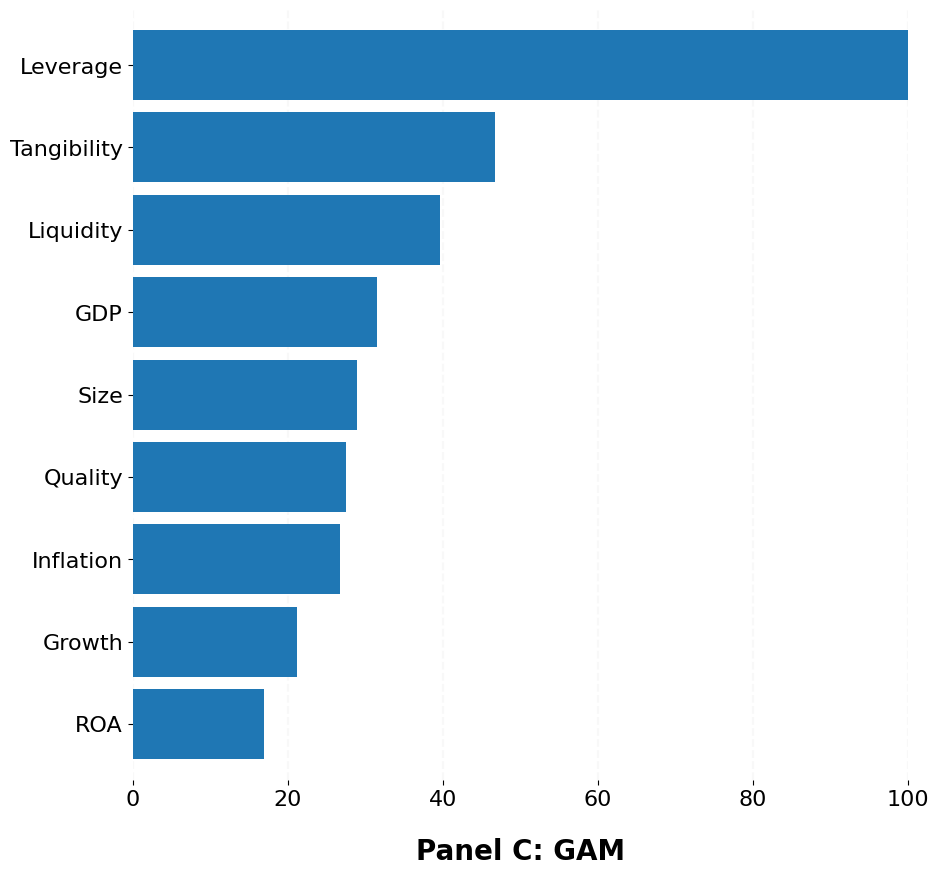

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#1f77b4', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel C: GAM", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_GAM.png')

In [15]:
from sklearn.ensemble import RandomForestRegressor

data["RF"] = []
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2


r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["RF"].append(round(r_squared*100, 4))
data["RF"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

importances = model.feature_importances_

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)


R-squared 0.657693052362051
RMSE 0.008686853646337483
      Variable  Coefficient
7          GDP         2.51
8    Inflation         2.83
4       Growth         3.75
5  Tangibility         4.60
3          ROA         7.26
1      Quality         9.27
6    Liquidity        10.08
0     Leverage        20.35
2         Size       100.00


/tmp/ipykernel_16974/205430632.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


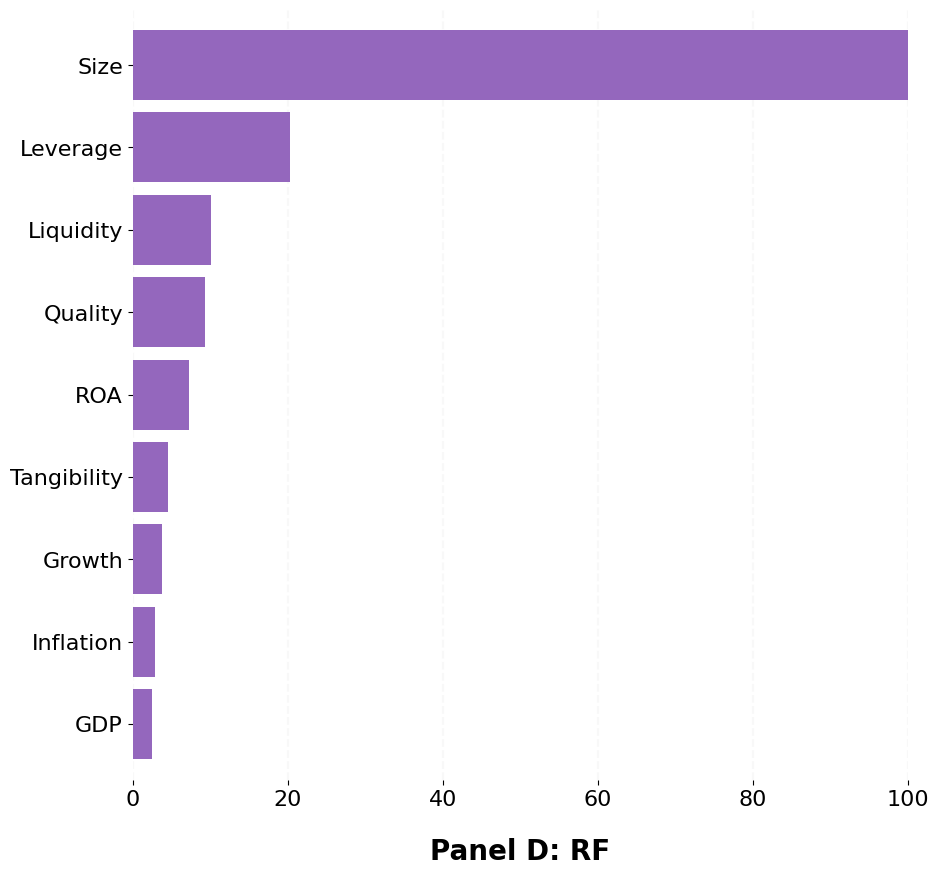

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#9467bd', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel D: RF", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_RF.png')

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

data["GBM"] = []

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2


r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
 # print('Coefficients:', model.coef_)
data["GBM"].append(round(r_squared*100, 4))
data["GBM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

importances = model.feature_importances_

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)

R-squared 0.7229020839547394
RMSE 0.007032019241795345
      Variable  Coefficient
7          GDP         0.48
8    Inflation         1.56
5  Tangibility         6.09
4       Growth         6.99
6    Liquidity         7.10
1      Quality         8.80
3          ROA        10.29
0     Leverage        21.21
2         Size       100.00


/tmp/ipykernel_16974/2019429249.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


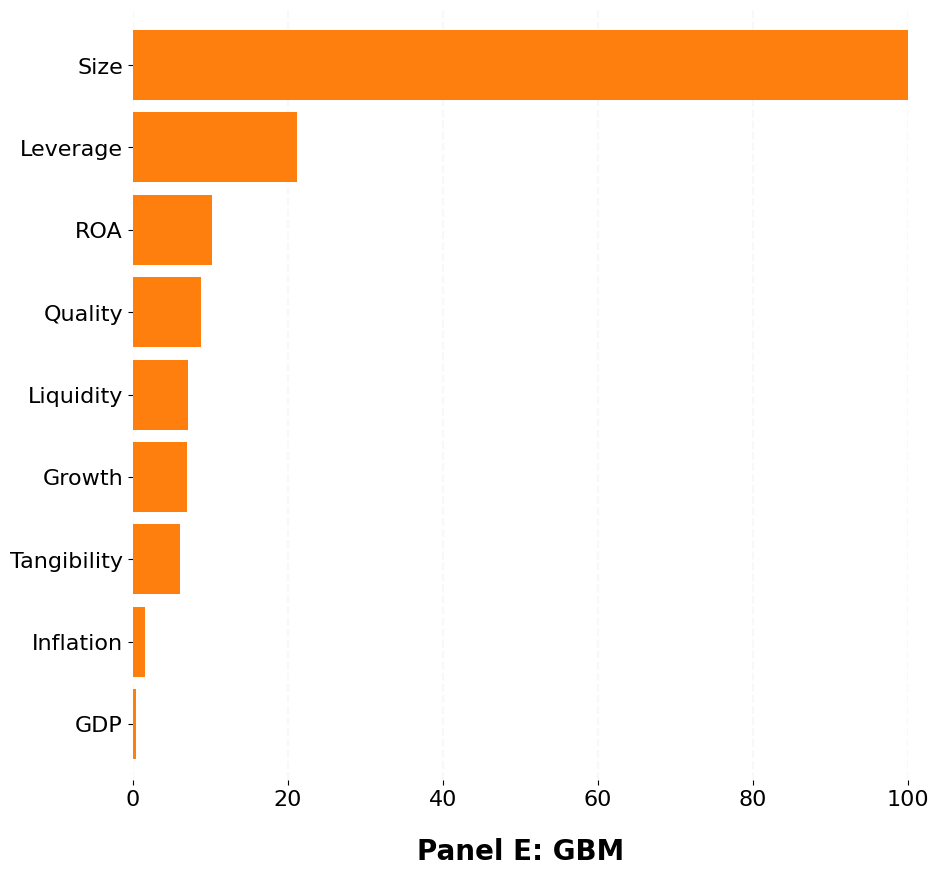

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#ff7f0e', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel E: GBM", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_GBM.png')

In [19]:
from sklearn.neural_network import MLPRegressor

data["NNET"] = []
importances_over_time = []

model = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2


r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

importances = abs(model.coefs_[0]).sum(axis=1)
importances = importances / max(importances) * 100
# importances_over_time.append(importances.round(4))

# print the model coefficients
data["NNET"].append(round(r_squared*100, 4))
data["NNET"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)


importances = abs(model.coefs_[0]).sum(axis=1)

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable': ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'GDP', 'Inflation'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# print(importances_over_time)

R-squared 0.5283519559683729
RMSE 0.011969191859399646


/home/notta/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/tmp/ipykernel_16974/4144608735.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


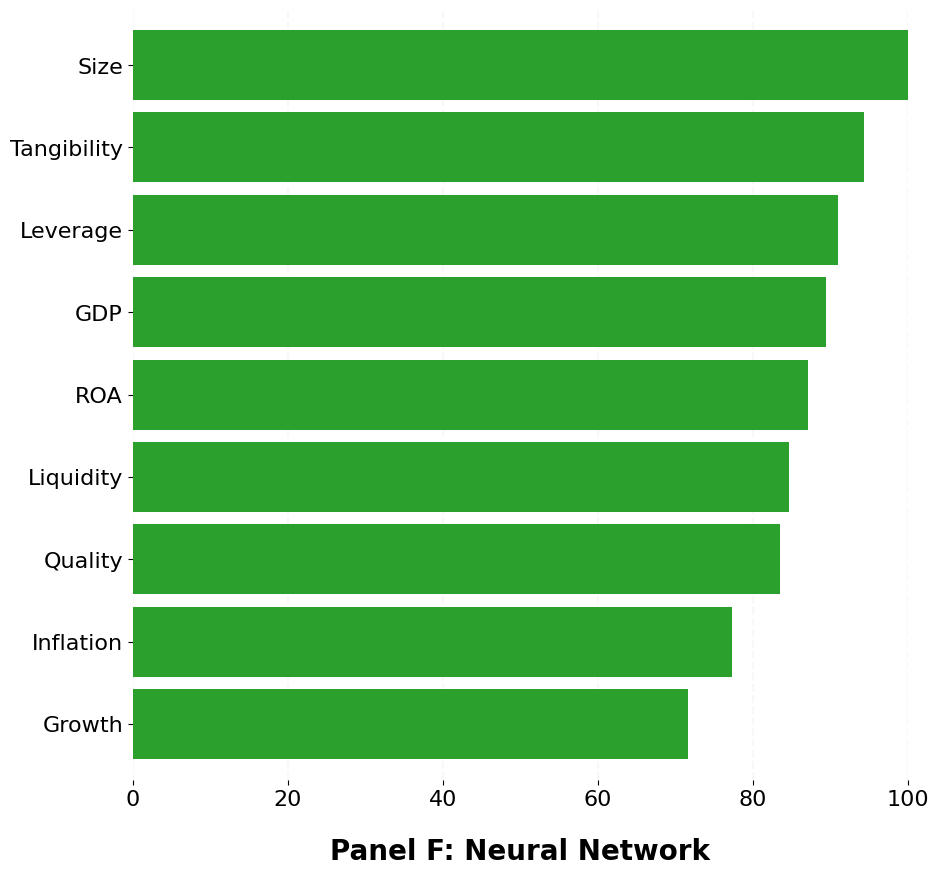

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#2ca02c', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel F: Neural Network", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_NNET.png')

In [21]:
data

{'LM': [40.9973, 0.0149733],
 'Lasso': [40.6423, 0.0150634],
 'GAM': [-25.3714, 0.031816],
 'RF': [65.7693, 0.0086869],
 'GBM': [72.2902, 0.007032],
 'NNET': [52.8352, 0.0119692]}